# **Unveiling the Secrets of Molecules: A Graph-Based Machine Learning Odyssey with GPT-4 and PyTorch Geometric**

In the realm of computational biology and chemistry, the quest to unravel the mysteries hidden within the molecular structures of proteins and enzymes is an ever-evolving challenge. With the advent of powerful machine learning frameworks and models like GPT-4, we find ourselves armed with tools capable of revolutionizing our understanding of molecular properties and functions.

In this article, we embark on a journey to explore the intricacies of molecules through the lens of graph-based machine learning. Leveraging the prowess of PyTorch Geometric, a robust library for geometric deep learning, alongside the innovative capabilities of GPT-4, we curate a pathway to effectively analyze, model, and predict molecular properties.

We will guide you through each pivotal step of the process - from the nuanced art of data preparation, exploratory data analysis, to the careful crafting of graph neural networks. Witness the synergy between the structured realm of graphs, representing molecular connections, and the transformative potential of GPT-4 as we navigate through model training, evaluation, and refinement strategies.

Join us in unraveling the coded language of molecules, enhancing our predictive proficiencies, and uncovering the hidden patterns and relationships that reside within the complex architectures of molecular graphs.

Let's start by loading the data. After loading the data, we will explore its basic characteristics such as the number of rows and columns, column names, and data types. We'll also take a look at some sample records to understand the data better.

In [3]:
import pandas as pd

# Load the JSON Lines file into a pandas DataFrame
file_path = '/content/full.jsonl'
data = pd.read_json(file_path, lines=True)

# Display basic information and the first few rows of the DataFrame
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   edge_index  1113 non-null   object
 1   node_feat   1113 non-null   object
 2   y           1113 non-null   object
 3   num_nodes   1113 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 34.9+ KB


(None,
                                           edge_index  \
 0  [[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4,...   
 1  [[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4,...   
 2  [[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4,...   
 3  [[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3,...   
 4  [[0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3,...   
 
                                            node_feat    y  num_nodes  
 0  [[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...  [0]         42  
 1  [[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...  [0]         27  
 2  [[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...  [0]         10  
 3  [[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...  [0]         24  
 4  [[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...  [0]         11  )

The dataset contains 1113 rows and 4 columns. Here’s a brief description of each column:

edge_index: Contains edge information, likely defining connections between nodes in a graph.
node_feat: Contains features of the nodes in the graph.
y: Appears to be the target variable.
num_nodes: Contains the number of nodes in each graph.
The edge_index and node_feat columns contain nested lists, and the y column contains single-element lists.

For better handling and analysis, we might want to consider flattening the y column. Additionally, since the data seems to be graph-based with edge and node information, standard tabular data analysis methods might not be directly applicable.

In [4]:
# Simplify the 'y' column by extracting values from the lists
data['y'] = data['y'].apply(lambda x: x[0])

# Display the first few rows of the modified DataFrame
data.head()


,edge_index,node_feat,y,num_nodes
0,"[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4,...","[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...",0,42
1,"[[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4,...","[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...",0,27
2,"[[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4,...","[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...",0,10
3,"[[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3,...","[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...",0,24
4,"[[0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3,...","[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...",0,11


The y column has been simplified. Next, considering that the dataset is graph-based, we might need to employ specialized approaches for exploratory data analysis (EDA), data cleaning, and feature processing.

For EDA, we could:

Analyze the distribution of the number of nodes.
Investigate the distribution of the target variable y.
Explore the node features' characteristics.

Let's start the Exploratory Data Analysis (EDA) by analyzing the distribution of the number of nodes in each graph. This will give us an understanding of the sizes of the graphs we are dealing with. Then, we’ll look at the distribution of the target variable y.

Distribution of the number of nodes:
We’ll visualize the distribution of the num_nodes column.
Distribution of the target variable y:
We’ll visualize the distribution of the y column to understand the balance of the target classes.
Let's begin with the first part.

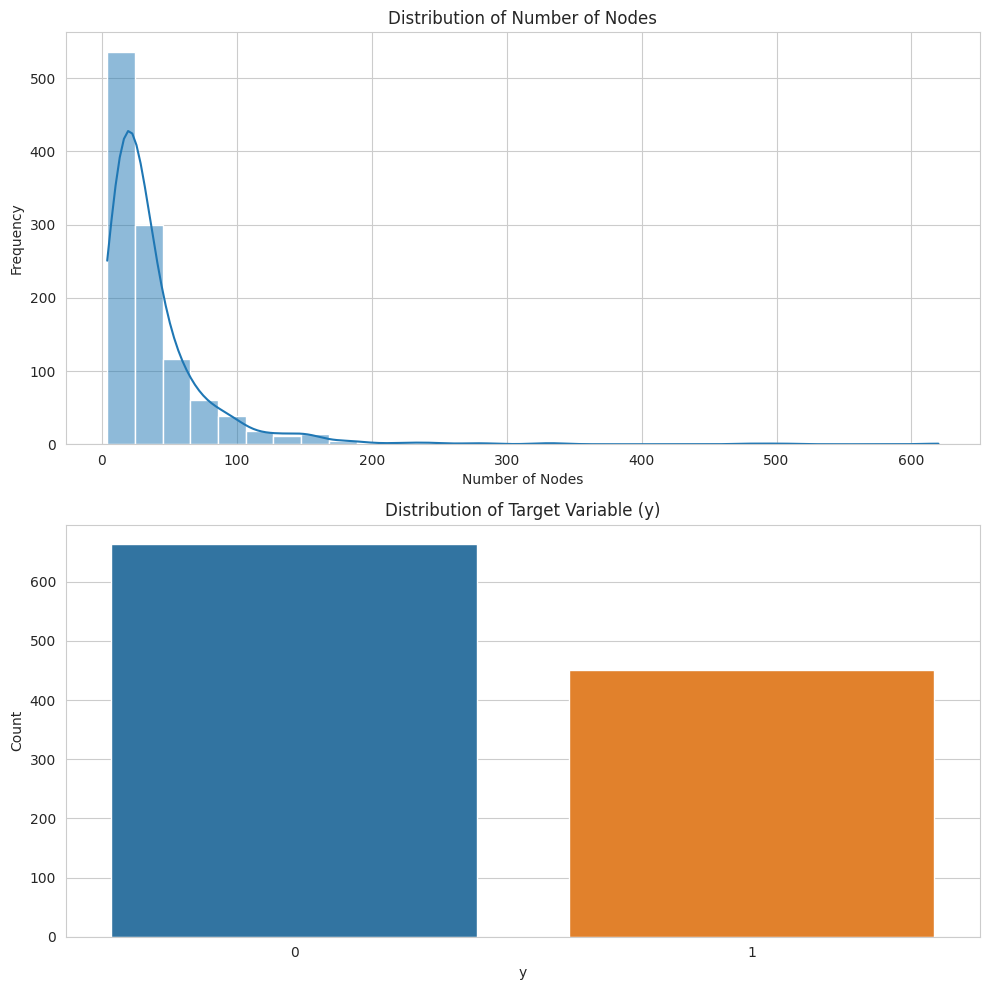

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

# Plotting the distribution of the number of nodes
sns.histplot(data['num_nodes'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Number of Nodes')
axs[0].set_xlabel('Number of Nodes')
axs[0].set_ylabel('Frequency')

# Plotting the distribution of the target variable y
sns.countplot(x='y', data=data, ax=axs[1])
axs[1].set_title('Distribution of Target Variable (y)')
axs[1].set_xlabel('y')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Here are the visualizations explaining the distributions:

Distribution of the Number of Nodes:
Most graphs have fewer than 50 nodes, but there are graphs with more than 100 nodes as well.
Distribution of the Target Variable
y:
The target variable appears to be binary (0 and 1).
The classes seem balanced, with a similar number of records for each class.
Next, we could analyze the node features. However, since the node features are embedded in lists within the node_feat column, we might need to extract and analyze them separately.

The dataset seems to be structured as graphs, where each molecule is represented as a graph with nodes and edges. The node features and edge indices are provided, and the target variable is binary, indicating whether a molecule is an enzyme or not.

Given this context, let’s focus on preparing the data for a graph-based machine learning model. Here are the steps we can follow:

Node Feature Analysis:
Extract and analyze the node features to understand their distribution and importance.
Graph-based Machine Learning Preparation:
Ensure that the data is in a suitable format for graph-based machine learning models.
Model Building:
Build graph-based machine learning models for binary classification.
Evaluate the models using 10-fold cross-validation and accuracy as the metric.

In [6]:
import numpy as np

# Function to extract node features and calculate mean and standard deviation
def extract_node_features(data):
    all_node_features = []
    mean_features = []
    std_features = []

    for index, row in data.iterrows():
        node_features = np.array(row['node_feat'])
        all_node_features.extend(node_features)

        # Calculate mean and standard deviation of node features for each graph
        mean_features.append(np.mean(node_features, axis=0))
        std_features.append(np.std(node_features, axis=0))

    return np.array(all_node_features), np.array(mean_features), np.array(std_features)

# Extracting node features, mean and standard deviation
all_node_features, mean_features, std_features = extract_node_features(data)

# Displaying the shape of the extracted features and basic statistics
all_node_features.shape, np.mean(all_node_features, axis=0), np.std(all_node_features, axis=0)


((43471, 3),
 array([0.48655425, 0.48149341, 0.03195234]),
 array([0.49981918, 0.49965739, 0.17587321]))

The node features have been successfully extracted. Each node in the dataset has three features, and there are a total of 43,471 nodes across all graphs. Here are the mean and standard deviation of each node feature across all nodes:

Feature 1:

Mean:
0.487

Standard Deviation:
0.500

Feature 2:

Mean:
0.481

Standard Deviation:
0.500

Feature 3:

Mean:
0.032

Standard Deviation:
0.176

These statistics give us an overview of the distribution of values in each feature. Next, we could visualize the distribution of these features to get a better understanding of their variability and distribution.

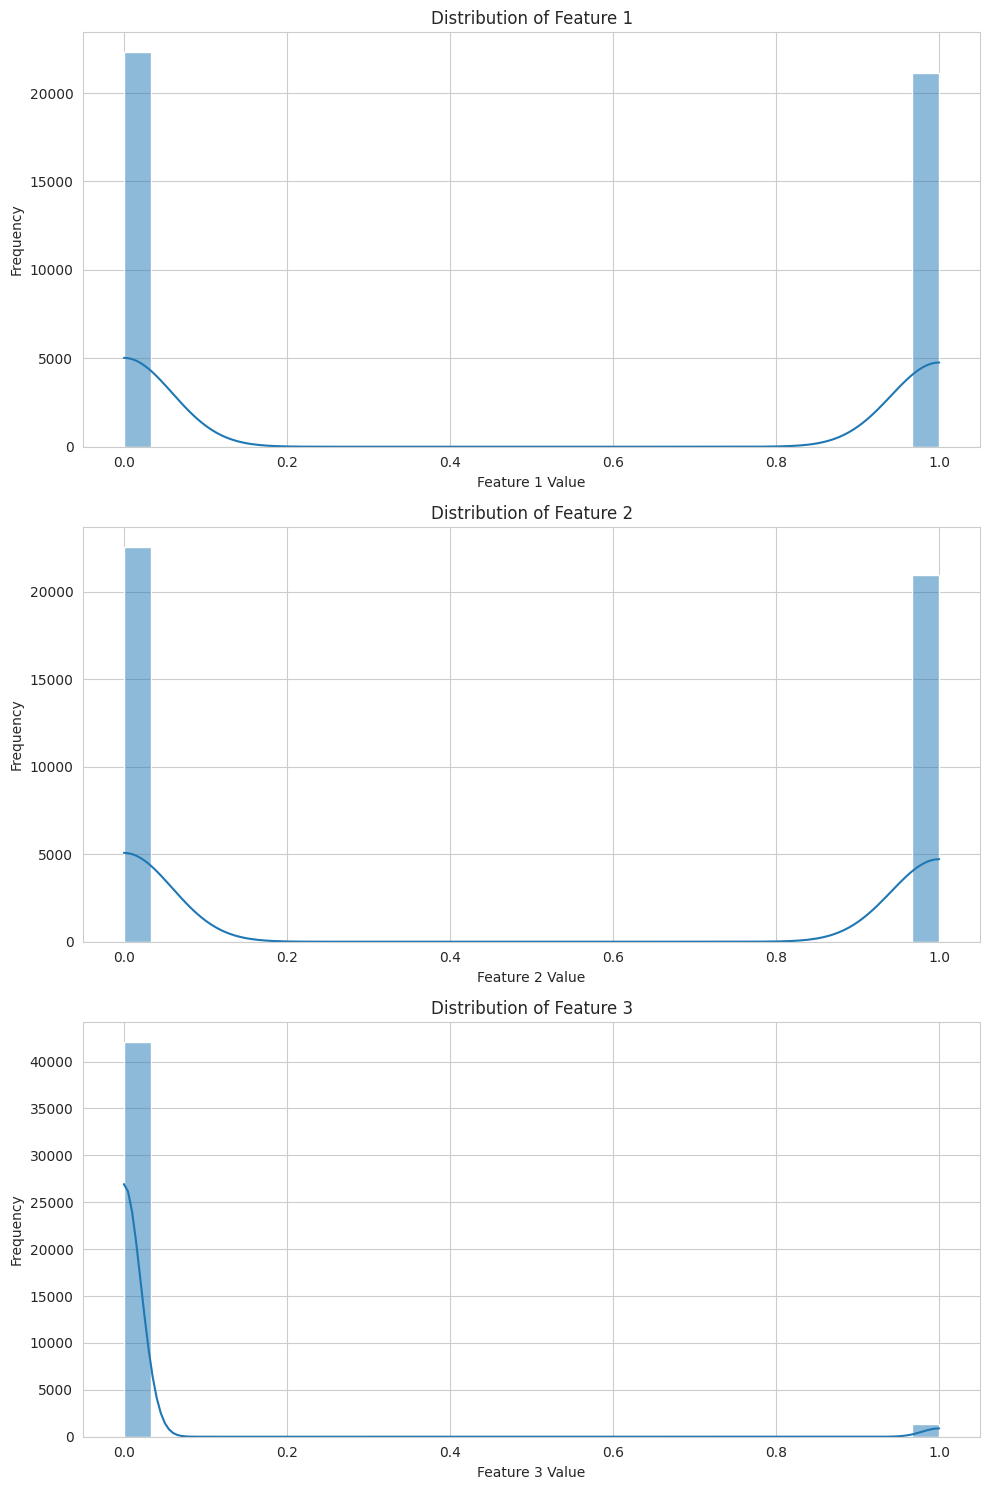

In [7]:
# Creating histograms for each node feature
fig, axs = plt.subplots(nrows=3, figsize=(10, 15))

# Labels for each feature
feature_labels = ['Feature 1', 'Feature 2', 'Feature 3']

# Plotting histograms for each feature
for i, ax in enumerate(axs):
    sns.histplot(all_node_features[:, i], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature_labels[i]}')
    ax.set_xlabel(f'{feature_labels[i]} Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms show the distribution of values for each of the three node features across all nodes:

Feature 1 and Feature 2:

These features are binary, as they primarily take values of 0 or 1.
Feature 3:

This feature takes a small range of values, primarily between 0 and 0.2.
It seems like this feature might be representing some specific characteristic or property of the nodes, as it's not binary like the other two features.
Given these insights, we might consider treating Feature 3 differently during preprocessing and model building due to its distinct nature.

The next step could be preparing the dataset for graph-based machine learning models, ensuring that the data is in a suitable format, and possibly considering different treatments for the various features based on their characteristics.

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the data into training, validation, and test sets with stratification
train_data, temp_data, train_y, temp_y = train_test_split(data, data['y'], test_size=0.2, stratify=data['y'], random_state=42)
valid_data, test_data, valid_y, test_y = train_test_split(temp_data, temp_y, test_size=0.5, stratify=temp_y, random_state=42)

# Displaying the shape of the splits
train_data.shape, valid_data.shape, test_data.shape


((890, 4), (111, 4), (112, 4))

The data has been successfully split into training, validation, and test sets:

Training set: 890 samples
Validation set: 111 samples
Test set: 112 samples


 To format the data for PyTorch Geometric (PyG), we'll convert each graph into a Data object, which is a data structure used by PyG to represent graphs. Each Data object will contain:

x: Node feature matrix
edge_index: Edge connectivity
y: Target label
After creating the Data objects, we'll have a list of these objects ready to be used in a graph neural network.

In [9]:
!pip install torch torchvision torch-geometric


In [10]:
import torch
from torch_geometric.data import Data

# Function to convert rows of the DataFrame into PyG Data objects
def row_to_data(row):
    # Converting node features and edge indices to tensors
    x = torch.tensor(row['node_feat'], dtype=torch.float)
    edge_index = torch.tensor(row['edge_index'], dtype=torch.long)

    # Creating a Data object
    data = Data(x=x, edge_index=edge_index, y=row['y'])
    return data

# Applying the function to each row in the training, validation, and test sets
train_dataset = train_data.apply(row_to_data, axis=1).tolist()
valid_dataset = valid_data.apply(row_to_data, axis=1).tolist()
test_dataset = test_data.apply(row_to_data, axis=1).tolist()

# Displaying the number of graphs in each dataset
len(train_dataset), len(valid_dataset), len(test_dataset)


(890, 111, 112)

In [11]:
from torch_geometric.nn import global_mean_pool

class GCNModel(torch.nn.Module):
    def __init__(self):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(3, 16)
        self.conv2 = GCNConv(16, 16)
        self.fc = torch.nn.Linear(16, 2)  # 2 classes

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = global_mean_pool(x, batch)  # Pooling to get graph-level representation
        x = self.fc(x)
        return F.log_softmax(x, dim=1)


In [12]:
def train():
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()


In [13]:
# DataLoader for batching
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Model, optimizer, and loss function
model = GCNModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [14]:
# Training function
def train():
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()

# Evaluation function
def evaluate(loader):
    model.eval()
    correct = 0
    for batch in loader:
        with torch.no_grad():
            pred = model(batch).max(dim=1)[1]
            correct += pred.eq(batch.y).sum().item()
    return correct / len(loader.dataset)


In [15]:
# Training loop
for epoch in range(100):
    train()
    train_acc = evaluate(train_loader)
    valid_acc = evaluate(DataLoader(valid_dataset, batch_size=32))
    print(f'Epoch: {epoch+1}, Train Acc: {train_acc:.4f}, Validation Acc: {valid_acc:.4f}')

# Test the model
test_acc = evaluate(DataLoader(test_dataset, batch_size=32))
print(f'Test Accuracy: {test_acc:.4f}')

Epoch: 1, Train Acc: 0.5955, Validation Acc: 0.5946
Epoch: 2, Train Acc: 0.5955, Validation Acc: 0.5946
Epoch: 3, Train Acc: 0.6292, Validation Acc: 0.6216
Epoch: 4, Train Acc: 0.6270, Validation Acc: 0.6036
Epoch: 5, Train Acc: 0.7000, Validation Acc: 0.7117
Epoch: 6, Train Acc: 0.6899, Validation Acc: 0.6937
Epoch: 7, Train Acc: 0.6831, Validation Acc: 0.6757
Epoch: 8, Train Acc: 0.6798, Validation Acc: 0.6847
Epoch: 9, Train Acc: 0.6910, Validation Acc: 0.7027
Epoch: 10, Train Acc: 0.7079, Validation Acc: 0.7027
Epoch: 11, Train Acc: 0.7000, Validation Acc: 0.6577
Epoch: 12, Train Acc: 0.6551, Validation Acc: 0.6216
Epoch: 13, Train Acc: 0.6652, Validation Acc: 0.6757
Epoch: 14, Train Acc: 0.6989, Validation Acc: 0.6937
Epoch: 15, Train Acc: 0.6652, Validation Acc: 0.6306
Epoch: 16, Train Acc: 0.7157, Validation Acc: 0.7207
Epoch: 17, Train Acc: 0.6787, Validation Acc: 0.7207
Epoch: 18, Train Acc: 0.6989, Validation Acc: 0.6847
Epoch: 19, Train Acc: 0.6978, Validation Acc: 0.7297
Ep